In [1]:
import nbsetup
import scipy as sp
import ensemblepy as ep
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [377]:
ep.Collection([[0.5, 0.5], [1,0]]).pooled

0.8112781244591328

In [367]:
def full_range(x):
    return norm([[1,0], [(1-x),x]])*10

def empty_states(x):
    a = np.zeros(x)
    a[0] = 1
    b = np.zeros(x)
    b[1] = 1
    return norm([a,b])*10

def maximum_inc(x):
    return np.identity(x)*10

def points(x):
    return [[x,x], [0,2*x]]


def norm(data):
    for i, row in enumerate(data):
        data[i] = row/np.sum(row)
    return np.array(data)

def half_ensembles(x):
    rows = []
    for i in range(x):
        rows.append([1,1])
        rows.append([2,0])
    return norm(rows)*2

def filled_states(x):
    a = np.zeros(x)
    a[0] = 1
    b = np.ones(x)
    return norm([a,b])*10

def limit(x):
    results = []
    for i in range(x):
        results.append([1,0])
    results.append(np.ones(2))
    return norm(results)*10

def limit_rows(x):
    results = []
    #for i in range(x):
    a = np.zeros(x)
    a[0] = 1
    results.append(a)
    results.append(np.ones(x))
    return norm(results)*10

In [368]:
def create_df(funcs):
    analysis = []
    for name, (func, raunge) in funcs.items():
        for x in raunge:
            data = func(x)
            e = ep.Collection(data)
            d = e.comparison()
            d['func'] = name
            d['x'] = x
            d['maxent'] = e.measures['maxent']
            d['pooled'] = e.measures['pooled']
            analysis.append(d)
    return pd.DataFrame(analysis)


In [381]:
df = create_data({
    'Comparing [(1-x), x] to [1,0]': (full_range, np.linspace(0,1.0,100)),
    'A single [0.5,0.5] with `x` many [1,0]': (limit, range(2,302,20)),
    'Identity maxtrix of size `x`': (maximum_inc, range(2,11)),
    '`x` many duplicated distributions': (half_ensembles, range(2,9)),
    'Additional filled states': (filled_states, range(2,28)),
    'Additional empty states': (empty_states, range(2,40)),
})

In [372]:
def plot_all(df, draft=False):
    uniques = df['func'].unique()
    if draft:
        uniques = uniques[:1]
    
    for i, title in enumerate(uniques):
    
        fig, ax = plt.subplots(1,3, figsize=(7,2.5), sharex=True, sharey=True)
        #ax = np.concatenate(ax)
        plt.tight_layout()
        
        udf = df[df['func']==title]
        ylim = (-0.05,max(udf['jsd'].max(),1.05))
        T = udf['incoherence']*np.sqrt(udf['pooled']/udf['maxent'])
        L = udf['incoherence']*np.sqrt(udf['maxent'])
        
        setup = (
            (0, 'Incoherence (I)', 'solid', 'purple', udf['incoherence']),
            (0, 'Incoherence squared', 'dashed', 'purple', udf['incoherence']**2),
            (0, 'T (no /Hpooled)', 'dashdot', 'darkorange', T),
            (0, 'L (no /Hmax)', 'dotted', 'orange', L),
            
            (1, 'Jensen-Shannon (JS)', 'solid', 'red', udf['jsd']),
            (1, 'JS/Hmax', 'dotted', 'darkred', udf['njsd']),     
            (1, 'Kullback–Leibler', 'dashdot', 'cornflowerblue', udf['kl']),
            (1, 'Hellinger', 'dashed', 'royalblue', udf['hellinger']),
            
            (2, 'Total variation', 'solid', 'saddlebrown', udf['total_var']),
            (2, 'Earth Movers', 'dashed', 'orange', udf['wasserstein']),
            (2, 'GF Complexity', 'dashdot', 'black', udf['max(gfc)']),
            (2, 'Chi^2 p-value', 'dotted', 'darkgreen', udf['chi2 p']),
        )
        
        legends = []
        for j, s in enumerate(setup):
            
            g = sns.lineplot(x=udf['x'], y=s[4], ax=ax[s[0]], label=s[1], color=s[3], linestyle=s[2])
            g.set(ylabel=None, ylim=ylim, xlabel='x')
            g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
            #sns.move_legend(g, "bottom left", bbox_to_anchor=(1, 1))
        
        ax[1].set(title=title)
                
        index = 'abcdefghi'
        fig.savefig('discrete-%s.eps' % index[i], bbox_inches='tight')
    return


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


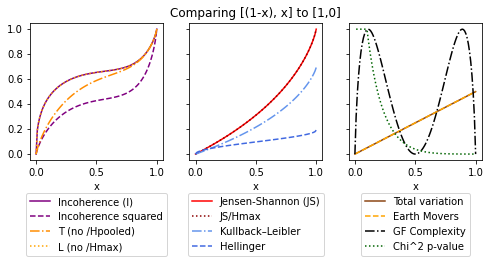

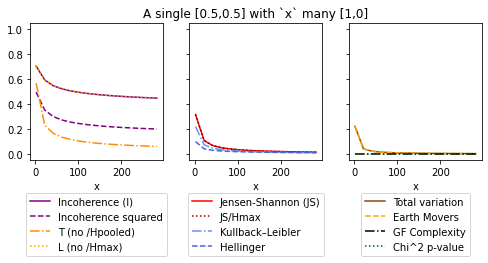

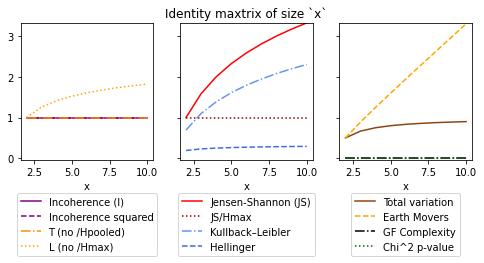

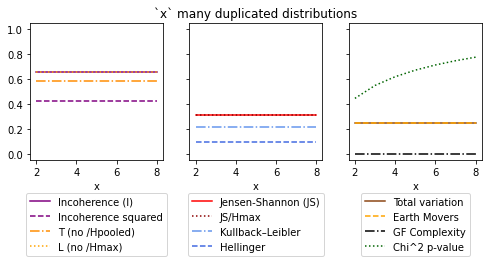

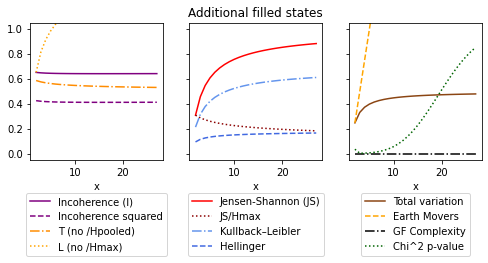

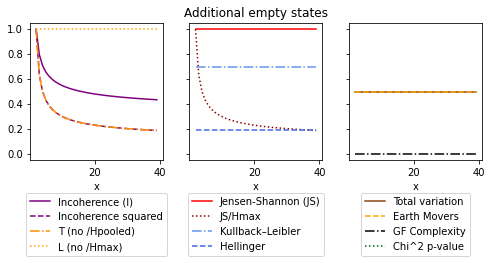

In [382]:
plot_all(df)

In [331]:
for X in ([[0.9,0.1,0,0,0], [0.8,0.2,0,0,0]],
          #[[0.9,0.1,0,0,0], [0.5,0.5,0,0,0]],
          #[[0.9,0.1,0,0,0], [0.5,0.1,0.1,0.1,0.1]],
          [[0.2, 0.2, 0.2, 0.2, 0.2], [0.4, 0.0, 0.2, 0.2, 0.2]],
         ):
    e = ep.Collection(X)
    c = e.comparison()
    print(X)
    print('pooled', c['pooled'])
    print('jsd', c['jsd'])
    print('njsd', c['njsd'])
    print('jsd/pooled', c['jsd']/c['pooled'])
    print('inc', c['incoherence'])
    print('maxent', e.measures['maxent'])
    print()

[[0.9, 0.1, 0, 0, 0], [0.8, 0.2, 0, 0, 0]]
pooled 0.6098403047164004
jsd 0.014378460478078642
njsd 0.006192465869093223
jsd/pooled 0.023577419148714987
inc 0.10696239775533554
maxent 2.321928094887362

[[0.2, 0.2, 0.2, 0.2, 0.2], [0.4, 0.0, 0.2, 0.2, 0.2]]
pooled 2.246439344671016
jsd 0.12451124978365324
njsd 0.05362407649824029
jsd/pooled 0.05542604570162011
inc 0.1031541484064902
maxent 2.321928094887362



In [ ]:
# we want systems with lower entropies
# to have higher relative measures
